# Lab 1: Regression

Welcome to the advanced Machine Learning Course.

The objective of this lab session is to code a few regression algorithms and to apply them to synthetic and real datasets.

We begin with the standard imports:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from numpy import matmul

## Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

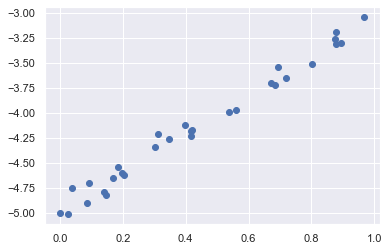

In [2]:
rng = np.random.RandomState(1)
x =  rng.rand(30)
y = 2 * x - 5 + 0.1* rng.randn(30)
plt.scatter(x, y);

Fill in the MultivariateLinearRegression class whose method fit takes a matrix $X$ and an array $y$ as input and returns an array of coefficients

In [3]:
class MultivariateLinearRegression():
    # Class for least-squares linear regression:

    def __init__(self,
                 grad_config = {"lr" : 1e-2, 
                                "num_steps" : 10**3,
                                "tolerance": 1e-04}):
        self.coef_ = None
        self.epochs_loss = []
        self.grad_config = grad_config
        
    def fit(self, 
            X , 
            y, 
            use_gradient_descent:bool = False):
        """ 
        Fit the data X,y.
        use_gradient_descent is a bool variable indicating whether 
        algorithm should use gradient descent algorihtm or clsoed 
        formula 

        """
        X_aug = self.transform_X(X)
        
        #fit model based on specified algorithm
        if use_gradient_descent: 
            self._gradient_descent(y,X_aug)
        else: 
            self.coef_ = np.linalg.inv(X_aug.T@X_aug)@X_aug.T@y
            self.coef_ = self.coef_.reshape((self.coef_.size,1))
            
    def _calculate_gradient(self, 
                            X_aug, 
                            y):
        """
        Function that returns gradient value of loss function
        """
        #calculate predictions with current parameters
        y_pred = self.predict(X = X_aug,
                              is_data_transformed = True) #column vector (p,1)
        num_parameters = X_aug.shape[0]
        gradients = X_aug.T@(y_pred - y) #column vector (p,1)
        return gradients
    
    def _calculate_loss(self, 
                        X_aug,
                        y):
        """
        Function that returns a loss value
        """
        #calculate predictions with current parameters
        y_pred = self.predict(X = X_aug,
                              is_data_transformed = True)    
        num_parameters = X_aug.shape[0]
        loss = (1/2 * (y_pred - y).T @ (y_pred - y))
        return float(loss)
    
    def _gradient_descent(self,
                          y, 
                          X_aug):
        """
        Implementation of gradient descent algorithm to find coefficients
        """
        #retriving parameters
        lr=self.grad_config["lr"]
        num_steps=self.grad_config["num_steps"]
        tolerance=self.grad_config["tolerance"]
        
        self.epochs_loss = [] #clear list of losses
        num_parameters = X_aug.shape[1]
        y = y.reshape((y.size,1)) #column vector (n,1)   
        
        # initation of parameters first 
        self.coef_ = np.zeros(num_parameters).reshape((num_parameters,1))  #column vector (p,1)
        
        #training loop
        for i in range(num_steps):
            #calculate gradient
            gradients = self._calculate_gradient(X_aug = X_aug, 
                                                 y = y) #column vector (p,1)
            
            #stopping condition if increase is marginal
            if (np.all(lr*gradients) <= tolerance):
                break
            
            #update coefficients
            self.coef_  = self.coef_ - lr * gradients
            
            # append total loss from epoch
            cost_value = self._calculate_loss(X_aug = X_aug,
                                              y = y)
            self.epochs_loss.append(cost_value)
    
    @staticmethod    
    def transform_X(X):
        """
        Transform X into matrix of size (number of sumples, number of 
        features + 1) which includes constant in a model     
        """
        num_rows = X.shape[0]
        ones_column = np.ones(num_rows)
        
        if X.ndim == 1:
            # we will treat 1D array always as 1 feature with num_samples observations
            X_aug = np.stack([ones_column, X], axis=1)
        else:
            X_aug = np.insert(X, 0, ones_column, axis=1)
        return X_aug       
        
    def predict(self, 
                X, 
                is_data_transformed:bool = False):
        """ 
        Make predictions for data X.
        is_data_transformed is a bool variable that tells whether data 
        was transformed to have intercept column
        """

        if is_data_transformed: 
            y_pred = X@self.coef_ 
        else:
            y_pred = self.transform_X(X)@self.coef_
            
        return(y_pred) #column vector (n,1)

    def plot_loss(self):
        """
        Plots graph showing total loss in each epoch
        """
        if self.epochs_loss != []:
            plt.plot(self.epochs_loss)
            plt.xlabel('Epoch number')
            plt.ylabel('Total loss')
            plt.show()
        else:
            print("Model wasn't trained with gradient descent algorithm")

### Try your model on the data and plot the data points and the fitted line:

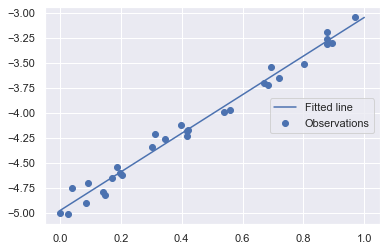

In [5]:
model = MultivariateLinearRegression()
model.fit(x,y, use_gradient_descent = True)
plt.scatter(x, y,label="Observations")
x_new = np.linspace(0,1)
plt.plot(x_new, model.predict(x_new), label="Fitted line")
plt.legend(loc = 'center right')
plt.show()

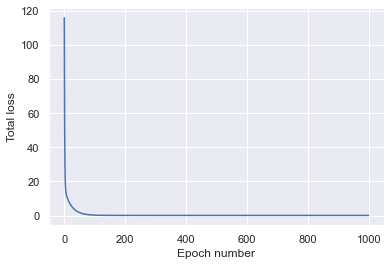

In [6]:
model.plot_loss()

Print the slope and the intercept:

In [6]:
print(f"Model slope:    {model.coef_[1]}")
print(f"Model intercept:    {model.coef_[0]}")

Model slope:    [1.92920553]
Model intercept:    [-4.97604683]


We see that the results are very close to the inputs, as we might hope.

Of course our linear regression estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building a toy example:

In [7]:
rng = np.random.RandomState(1)
X = 3 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model = MultivariateLinearRegression()
model.fit(X, y)
print(model.coef_) # perfect fitting

[[ 0.5]
 [ 1.5]
 [-2. ]
 [ 1. ]]


Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can our estimator to fit lines, planes, or hyperplanes to our data.
It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.

## Basis Function Regression

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.

The idea is to take our multidimensional linear model:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

### Polynomial basis functions

This polynomial projection is useful enough that it is built into Scikit-Learn, using the ``PolynomialFeatures`` transformer:

In [8]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(5, include_bias=False) # with or without intercept
poly.fit_transform(x[:, None])

array([[   2.,    4.,    8.,   16.,   32.],
       [   3.,    9.,   27.,   81.,  243.],
       [   4.,   16.,   64.,  256., 1024.]])

We see here that the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponent of each value.
This new, higher-dimensional data representation can then be plugged into a linear regression

With this transform, we can use the linear model to fit much more complicated relationships between $x$ and $y$. 
For example, here is a sine wave with noise:

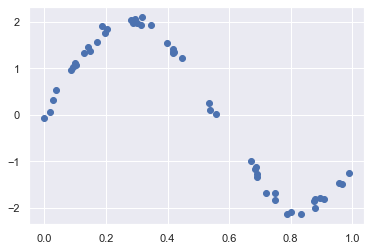

In [9]:
rng = np.random.RandomState(1)
x = rng.rand(50)
y = 2 * np.sin(1.8*np.pi*x) + 0.1 * rng.randn(50)


plt.scatter(x, y)


### Fit the linear model with polynomial features on the sine wave. Try with different degrees. Plot the fitted curve along with the data

In [10]:
def fit_and_plot_poly(x,
                      y,
                      grad_config,
                      degree=1,
                      use_gradient_descent:bool = False):
    #transform features to polynomial 
    poly = PolynomialFeatures(degree, include_bias=False)
    x_transformed = poly.fit_transform(x[:, None])
    
    #fit model to transformed features
    model = MultivariateLinearRegression(grad_config)
    model.fit(x_transformed,y,use_gradient_descent = use_gradient_descent)
    
    #plot data
    plt.scatter(x, y)
    
    #plot fitted line
    x_new = np.linspace(0,1)
    x_transformed_new = poly.fit_transform(x_new[:, None])
    y_pred = model.predict(x_transformed_new)
    plt.plot(x_new, y_pred)
    plt.show()
    
    #calculating loss value
    y_new = y.reshape((y.size,1)) 
    cost_value = (np.subtract(y_pred,y_new))**2
    print(f"Total loss value: {1/2*np.sum(cost_value)}")

In [11]:
grad_config = {"lr" : 1e-2, 
               "num_steps" : 10**3,
               "tolerance": 1e-04}

#### 2 Degree

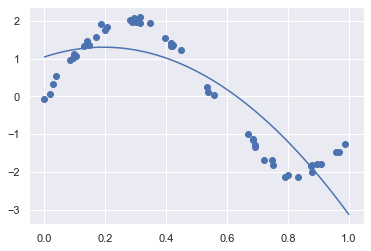

Total loss value: 97.63301958614966


In [12]:
fit_and_plot_poly(x,y,grad_config,2)

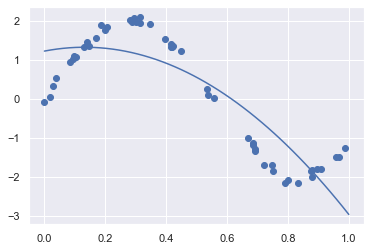

Total loss value: 94.09165630439178


In [13]:
fit_and_plot_poly(x,y,grad_config,2,True)

#### 3 Degree

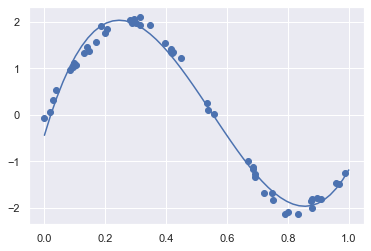

Total loss value: 92.59013163681405


In [14]:
fit_and_plot_poly(x,y,grad_config,3)

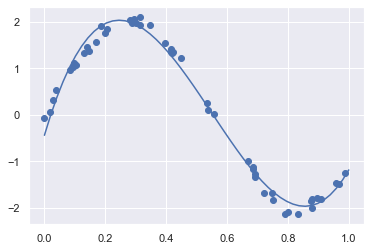

Total loss value: 92.58993279843253


In [14]:
grad_config = {"lr" : 2e-2, 
               "num_steps" : 10**5,
               "tolerance": 1e-04}
fit_and_plot_poly(x,y,grad_config,3,True)

#### 4 Degree

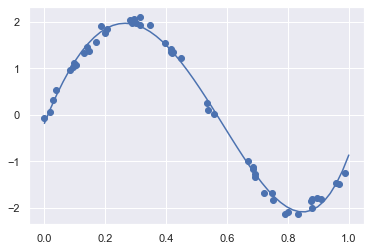

Total loss value: 92.37367703596469


In [15]:
fit_and_plot_poly(x,y,grad_config,4)

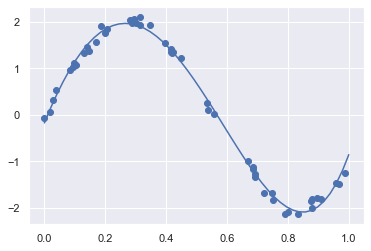

Total loss value: 92.36897444593936


In [16]:
fit_and_plot_poly(x,y,grad_config,4,True)

#### 5 degree

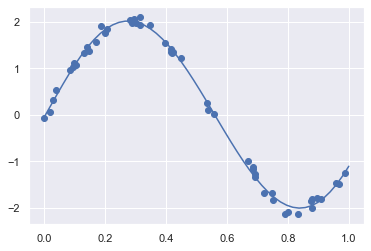

Total loss value: 93.88748010921158


In [17]:
fit_and_plot_poly(x,y,grad_config,5)

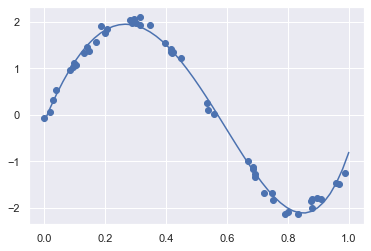

Total loss value: 92.14813873611932


In [18]:
fit_and_plot_poly(x,y,grad_config,5,True)

Our linear model can provide an excellent fit to this non-linear data!

## Regularization

The introduction of basis functions into our linear regression makes the model much more flexible, but it also can very quickly lead to over-fitting and numeric problems.

### Ridge regression ($L_2$ Regularization)

Perhaps the most common form of regularization is known as *ridge regression* or $L_2$ *regularization*, sometimes also called *Tikhonov regularization*.
This proceeds by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the model fit would be 
$$
P = \alpha\sum_{n=1}^N \theta_n^2
$$
where $\alpha$ is a free parameter that controls the strength of the penalty.

 Fill in the following class:

In [19]:
import random 
import math

class RidgeRegularization(MultivariateLinearRegression):
    # Class for least-squares linear regression:

    def __init__(self, 
                 alpha,
                 grad_config = {"lr" : 1e-2, 
                                "num_steps" : 10**3,
                                "tolerance": 1e-04}):
        super().__init__(grad_config)
        self.alpha_ = alpha     
    
    def fit(self, 
            X , 
            y, 
            use_gradient_descent:bool = False):
        """ 
        Fit the data X,y.
        use_gradient_descent is a bool variable indicating whether 
        algorithm should use gradient descent algorihtm or clsoed 
        formula 

        """
        # Transforming data to have intercept
        X_aug = super().transform_X(X)
        
        #transforming y to column vector
        y = y.reshape((y.size,1))
        
        #fit model based on specified algorithm
        if use_gradient_descent: 
            self._gradient_descent(y,X_aug)
        else: 
            #computing explicit formula
            num_samples,num_features = X_aug.shape
            I = np.eye((num_features))
            coef_ = (np.linalg.inv(X_aug.T @ X_aug + self.alpha_ * I) @ X_aug.T @ y)

            # Update self.coef_
            self.coef_ = coef_        
    
    def _calculate_gradient(self, 
                            X_aug, 
                            y):
        
        """
        Function that returns gradient value of loss function
        """
        #calculate predictions with current parameters
        y_pred = self.predict(X = X_aug,
                              is_data_transformed = True) #column vector (p,1)
        num_parameters = X_aug.shape[0]
        
        regularization_grad = self.coef_
        gradients = X_aug.T@(y_pred - y) + self.alpha_ * regularization_grad #column vector (p,1)
        return gradients
    
    def _calculate_loss(self, 
                        X_aug,
                        y):
        """
        Function that returns a loss value
        """
        #calculate predictions with current parameters
        y_pred = self.predict(X = X_aug,
                              is_data_transformed = True)    
        num_parameters = X_aug.shape[0]
        
        regularization = float(1/2* self.coef_.T @ self.coef_)
        loss = (1/2 * (y_pred - y).T @ (y_pred - y)) + self.alpha_ * regularization
        return float(loss)
    
    #def predict(self...)
    #is inherited from MultivariateLinearRegression class
                

### Try the vanilla linear model then the ridge regression for different value of regularisation on the following data 

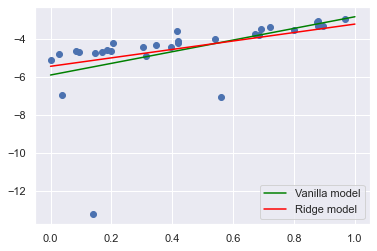

In [20]:
np.random.seed(300)
rng = np.random.RandomState(1)
x =  rng.rand(30)
y = 2 * x - 5 + 0.1* np.random.standard_cauchy(30)
plt.scatter(x, y)

#plotting vanilla model
model = MultivariateLinearRegression()
model.fit(x,y)
x_new = np.linspace(0,1)
y_pred = model.predict(x_new)
plt.plot(x_new, y_pred,"green",label = "Vanilla model")

#plotting ridge regression model
model_r = RidgeRegularization(alpha = 0.5)
model_r.fit(x,y)
y_pred_r = model_r.predict(x_new)
plt.plot(x_new, y_pred_r,"red",label = "Ridge model")

plt.legend()
plt.show()

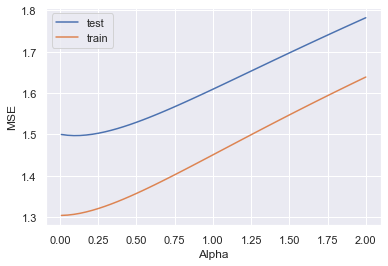

In [21]:
from statistics import mean
k = 5
max_alpha = 2
alpha_list = np.linspace(0.01,max_alpha)
test_cost = list()
train_cost = list()
num_observations = len(x)
ordered = list(range(num_observations))
random.shuffle(ordered)
upper_index = math.ceil(num_observations/k)

#for each alpfa I will perform k-fold CV
for alpha in alpha_list:
    model = RidgeRegularization(alpha = alpha)
    temp_cost = list()
    temp_cost2 = list()
    
    #performing k cross validation
    for i in range(k):
        
        #splitting into test/train 
        indicies = ordered[upper_index*i:upper_index*(i+1)]
        x_test = np.asarray(x[indicies])
        x_train = np.asarray([x[i] for i in ordered if i not in indicies])

        y_test = np.asarray(y[indicies])
        y_train = np.asarray([y[i] for i in ordered if i not in indicies])
        model.fit(x_train,y_train)
        
        #predict on test data
        y_pred = model.predict(x_test)
        
        #calculate MSE - TEST
        m = len(y_test)
        J = float((1./(2*m)) * (y_pred.flatten() - y_test).T @ (y_pred.flatten() - y_test))
        temp_cost.append(J)
        
        #calculate MSE - TRAINING
        y_pred = model.predict(x_train)
        m = len(y_train)
        J = float((1./(2*m)) * (y_pred.flatten() - y_train).T @ (y_pred.flatten() - y_train))
        temp_cost2.append(J)
        
        
    test_cost.append(mean(temp_cost))
    train_cost.append(mean(temp_cost2))
    
plt.plot(alpha_list, test_cost, label = "test")
plt.plot(alpha_list, train_cost, label = "train")
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.legend()
plt.show()

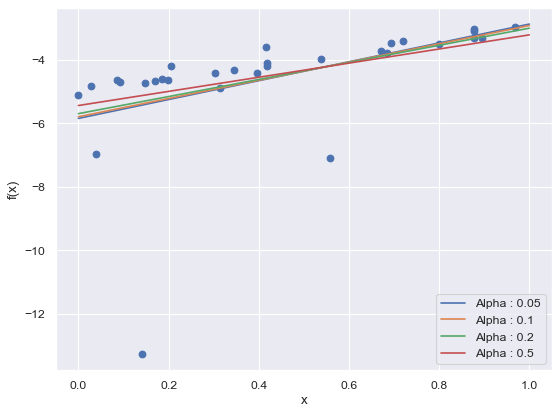

In [22]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
alpha_list = [0.05,0.1,0.2,0.5]
x_new = np.linspace(0,1)

plt.scatter(x, y)
for alpha in alpha_list:
    model_r = RidgeRegularization(alpha = alpha)
    model_r.fit(x,y)
    y_pred_r = model_r.predict(x_new)
    plt.plot(x_new, y_pred_r,label = f"Alpha : {alpha}")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

### Which range of value for the regularization constraint would you choose ? Why ? 

To solve a problem with generalization of model (so to create a model that will have similar performence on new unseen data) I would choose alpha value for which average test MSE in 5 fold cross validation is minimal. It would be alpha between 0.1 and 0.25, which is visible on 2nd graph above.

### Lasso regression ($L_1$ Regularization)

In [24]:
from sklearn.linear_model import LinearRegression
from scipy import linalg
import time

class LassoRegression(MultivariateLinearRegression):
    # Class for Lasso linear regression:

    def __init__(self, alpha):
        self.coef_ = None
        self.alpha_ = alpha
        
    @staticmethod
    def soft_threshold(coef, L):
        """Soft thresholding of x at level u"""
        return np.sign(coef) * np.maximum(np.abs(coef) - L , 0.)
    
    def fit(self, X, y,epochs = 1000):
        """ 
        Fit the data X,y using proximal gradient algorithm
        """
        # Create a (num_samples, num_features+1) np.array X_aug whose first column 
        # is a column of all ones (so as to fit an intercept).
        X_aug = super().transform_X(X)
        
        #transforming y to column vector
        y = y.reshape((y.size,1))
       
        # Update the coeff with the ista algorithm 
        num_observations = X_aug.shape[0]
        num_params = X_aug.shape[1]
        
        #setting theta param so convergence is guaratneed
        theta = 1/np.sum((X_aug.T@X_aug)**2)
        
        #initiating parameters
        self.coef_ = np.zeros(num_params).reshape((num_params,1))      
        
        for epoch in range(epochs):
            #calculating gradient step
            gradients = X_aug.T @ (X_aug@self.coef_-y)
            
            #calculating beta_hat
            coef_ = self.coef_-theta*gradients
            
            #calculating closed form operator
            self.coef_ = self.soft_threshold(coef_ , self.alpha_*theta)
            
    #def predict(self...)
    #is inherited from MultivariateLinearRegression class    

### Fit the Lasso regression for different value of regularisation on the following data.

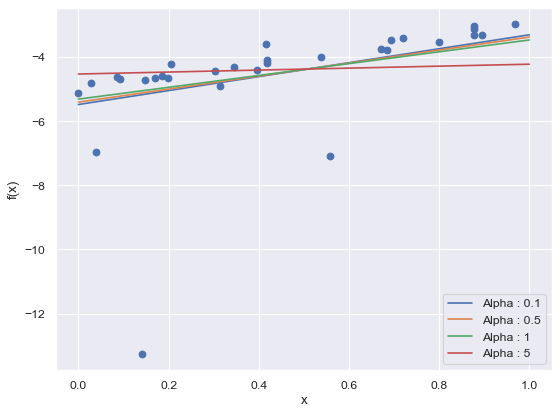

In [25]:
from matplotlib.pyplot import figure

np.random.seed(300)
rng = np.random.RandomState(1)
x =  rng.rand(30)
y = 2 * x - 5 + 0.1* np.random.standard_cauchy(30)

figure(figsize=(8, 6), dpi=80)
alpha_list = [0.1,0.5,1,5]
x_new = np.linspace(0,1)

plt.scatter(x, y)
for alpha in alpha_list:
    model_l = LassoRegression(alpha = alpha)
    model_l.fit(x,y)
    y_pred_l = model_l.predict(x_new)
    plt.plot(x_new, y_pred_l,label = f"Alpha : {alpha}")

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

### Try regularisation term greater than 10 for Ridge and Lasso. Compare the obtained. coefficients Explain the difference

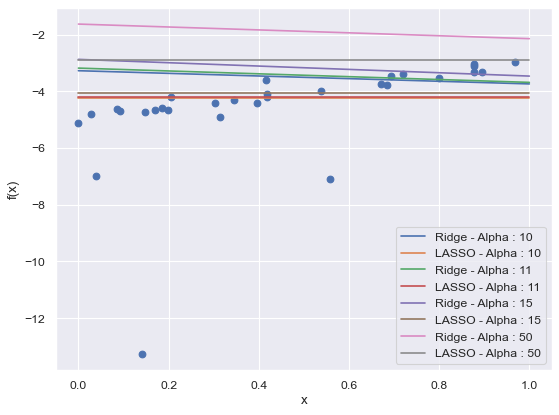

In [26]:
alpha_list = [10,11,15,50]
figure(figsize=(8, 6), dpi=80)
plt.scatter(x, y)
for alpha in alpha_list:
    #plotting Lasso regression
    model_r = RidgeRegularization(alpha = alpha)
    model_r.fit(x,y)
    y_pred_r = model_r.predict(x_new)
    plt.plot(x_new, y_pred_r,label = f"Ridge - Alpha : {alpha}")
    
    #plotting Ridge regression
    model_l = LassoRegression(alpha = alpha)
    model_l.fit(x,y)
    y_pred_l = model_l.predict(x_new)
    plt.plot(x_new, y_pred_l,label = f"LASSO - Alpha : {alpha}")


plt.xlabel('x')
plt.ylabel('f(x)')    
plt.legend()
plt.show()

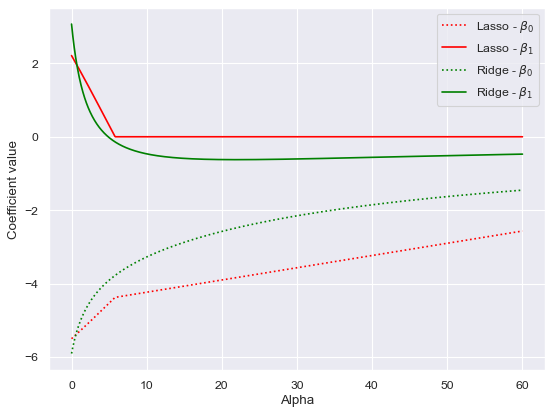

In [27]:
alpha_list = np.linspace(0,60,num=1000)
constant_lasso = list()
constant_ridge = list()
beta_1_lasso = list()
beta_1_ridge = list()

for alpha in alpha_list:
    #fitting Lasso regression
    model_r = RidgeRegularization(alpha = alpha)
    model_r.fit(x,y)   
    
    #fitting Ridge regression
    model_l = LassoRegression(alpha = alpha)
    model_l.fit(x,y)
    
    #saving coefficients
    constant_lasso.append(float(model_l.coef_[0]))
    beta_1_lasso.append(model_l.coef_[1])
    constant_ridge.append(model_r.coef_[0])
    beta_1_ridge.append(model_r.coef_[1])

#plotting coefficients
figure(figsize=(8, 6), dpi=80)
plt.plot(alpha_list, constant_lasso,label = r"Lasso - $\beta_0$", color = "red",linestyle='dotted')
plt.plot(alpha_list, beta_1_lasso,label = r"Lasso - $\beta_1$", color = "red")
plt.plot(alpha_list, constant_ridge,label = r"Ridge - $\beta_0$", color = "green",linestyle='dotted')
plt.plot(alpha_list, beta_1_ridge,label = r"Ridge - $\beta_1$", color = "green")
plt.xlabel('Alpha')
plt.ylabel('Coefficient value')
plt.legend()
plt.show()

Bigger alpha parameter in Ridge and Lasso regression results in bigger shrinkage of coeffcient absolute values. This comes from the formula of loss function where for bigger alpha values more penalty is given for high coeffcient absolute values. However as the given penalty depends on model type, obtained coeffcients are different. In Lasso proximal gradient algorithm iteratively adjust coeffcient so loss function decreases and uses soft threshold function which zeros all coeffcients that are in close neighbourhood of 0. While Ridge regression shrinks all regression coefficients towards zero but smoothly.

To better understand why Lasso zeros coef while Ridge moves them towards zero it is beneficial to look at following graph

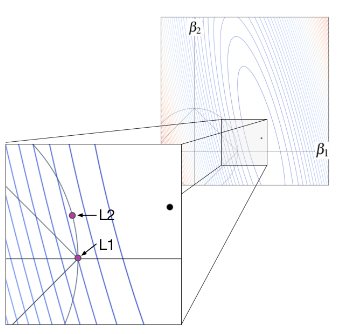

For the L1 case, the optimal  location is the purple dot at the diamond tip. This is true because any movement away from that spot increases the loss (eliptical lines are level sets of loss function without loss, black lines are: diamond - level set of penalty in L1, circle - level set of penalty in L2). Take a look at the contour line emanating from the L1 purple dot. The associated ellipse has the same loss value at all locations. Any  position outside of that ellipse, away from the black dot, has higher loss; any inside that ellipse have lower loss. Any movement in either direction along the diamond edge, away from the purple dot, increases the loss because  immediately moves outside of the contour associated with the L1 purple dot. Moving the black dot up and to the left, however, would start to make nonzero L1 coefficients more likely.

For the L2 case, the optimal  location is at the other purple dot location, and not on the axis like the L1 case. Because the L2 purple dot is inside the contour line that meets the L1 dot on the axis, it has lower loss value than that contour line. Moving the purple dot along the circular constraint line in any direction would increase the loss. The optimal L2 coefficients are nonzero, despite the fact that the non-regularized loss function minimum (black dot) is very close to the x axis.

## Robust regression

In [28]:
class RobustRegression(MultivariateLinearRegression):

    def __init__(self, potential, delta):
        #condition on potentail value
        assert potential in ["huber", "bisquare"]
        
        self.coef_ = None
        self.potential_ = potential
        self.delta_ = delta
        
    def weight_function(self, x):
        #for better code readability
        delta = self.delta_
        potential = self.potential_
        
        #calculating weight function
        if potential == "huber":
            if np.abs(x) < delta:
                return(1)
            else:
                return(delta / np.abs(x))

        if potential == "bisquare":
            if np.abs(x) < delta:
                return( (1 - ( x / delta )**2 )**2 )
            else:
                return( 0 )
    
    def fit(self, X, y):
        """ 
        Fit the data X,y using IRLS algorithm
        """
        # Create a (num_samples, num_features+1) np.array X_aug whose first column 
        # is a column of all ones (so as to fit an intercept).
        X_aug = super().transform_X(X)
        
        #transforming y to column vector
        y = y.reshape((y.size,1))
                
        #applying IRLS algorithm from slide 36
        #initialization of coefficients to OLS
        model = super().__init__()
        super().fit(X,y)     
        
        maxiter = 300
        
        #training loop
        for i in range(maxiter):
            #calculating errors
            e = y - X_aug @ self.coef_
            
            #calculating weights
            weights = np.vectorize(self.weight_function)(e)
            W = np.diag(weights.flatten())
            
            #updating coefficients
            self.coef_ = np.linalg.inv(X_aug.T @ W @ X_aug) @ X_aug.T @ W @ y

Try it in the following data and compare with the performance of the different models:

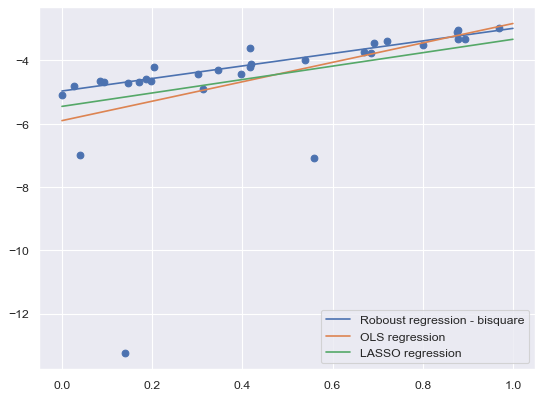

In [29]:
delta = 2
x_new = np.linspace(0,1)
figure(figsize=(8, 6), dpi=80)

np.random.seed(300)
rng = np.random.RandomState(1)
x =  rng.rand(30)
y = 2 * x - 5 + 0.1* np.random.standard_cauchy(30)
plt.scatter(x, y);

#plotting robust regression with bisquare weight 
model_rob = RobustRegression("bisquare",delta)
model_rob.fit(x,y)
y_pred_rob_b = model_rob.predict(x_new)
plt.plot(x_new, y_pred_rob_b,label = f"Roboust regression - bisquare")

#plotting OLS 
model = MultivariateLinearRegression()
model.fit(x,y)
y_pred = model.predict(x_new)
plt.plot(x_new, y_pred,label = f"OLS regression")

#plotting LASSO 
model =  LassoRegression(alpha = 0.25)
model.fit(x,y)
y_pred = model.predict(x_new)
plt.plot(x_new, y_pred,label = f"LASSO regression")    
         
plt.legend()
plt.show()

We can see that Robust regression estimated line is the least influenced by outliers which is expected as it assigns small weights to them while estimating parameters.

## Example: Predicting Bicycle Traffic

As an example, let's take a look at whether we can predict the number of bicycle trips across Seattle's Fremont Bridge based on weather, season, and other factors.

In this section, we joinned the bike data with another dataset, and try to determine the extent to which weather and seasonal factors—temperature, precipitation, and daylight hours—affect the volume of bicycle traffic through this corridor.

We will perform a simple linear regression to relate weather and other information to bicycle counts, in order to estimate how a change in any one of these parameters affects the number of riders on a given day.

Let's start by loading the dataset:

In [30]:
import pandas as pd
daily = pd.read_csv('data-1.csv', index_col='Date', parse_dates=True)

With this in place, we can choose the columns to use, and fit a linear regression model to our data:

In [31]:
# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)']
X = daily[column_names]
y = daily['Total']

from sklearn import preprocessing

xx = X.values.astype(float) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(xx)

model = RidgeRegularization(0.1)
model1 = MultivariateLinearRegression()
model.fit(X.values.astype(float), y.values.astype(float))
daily['predicted'] = model.predict(X.values.astype(float))

Finally, we can compare the total and predicted bicycle traffic visually:

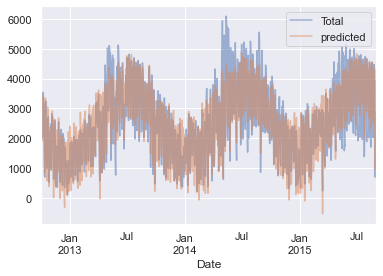

In [32]:
daily[['Total', 'predicted']].plot(alpha=0.5);

It is evident that we have missed some key features, especially during the summer time.
Either our features are not complete (i.e., people decide whether to ride to work based on more than just these) or there are some nonlinear relationships that we have failed to take into account (e.g., perhaps people ride less at both high and low temperatures).
Nevertheless, our rough approximation is enough to give us some insights, and we can take a look at the coefficients of the linear model to estimate how much each feature contributes to the daily bicycle count:

In [34]:
params = pd.Series(model.coef_.flatten(), index=pd.concat([pd.Series(["Intercept"]),pd.Series(X.columns.values)]))
params

Intercept         34.314897
Mon              490.296158
Tue              596.243539
Wed              578.405151
Thu              468.195949
Fri              164.217455
Sat            -1116.446711
Sun            -1146.596643
holiday        -1184.393535
daylight_hrs     129.240672
PRCP            -663.374237
dry day          551.976034
Temp (C)          66.065583
dtype: float64

We first see that there is a relatively stable trend in the weekly baseline: there are many more riders on weekdays than on weekends and holidays.
We see that for each additional hour of daylight, 129 ± 9 more people choose to ride; a temperature increase of one degree Celsius encourages 65 ± 4 people to grab their bicycle; a dry day means an average of 548 ± 33 more riders, and each inch of precipitation means 665 ± 62 more people leave their bike at home.
Once all these effects are accounted for, we see a modest increase of 27 ± 18 new daily riders each year.

Our model is almost certainly missing some relevant information. For example, nonlinear effects (such as effects of precipitation *and* cold temperature) and nonlinear trends within each variable (such as disinclination to ride at very cold and very hot temperatures) cannot be accounted for in this model.
Additionally, we have thrown away some of the finer-grained information (such as the difference between a rainy morning and a rainy afternoon), and we have ignored correlations between days (such as the possible effect of a rainy Tuesday on Wednesday's numbers, or the effect of an unexpected sunny day after a streak of rainy days).
These are all potentially interesting effects, and you now have the tools to begin exploring them if you wish!